<font size=6><b> lec03.머신러닝_전처리 : 범주형(categorical) 변수

### 범주형 변수 categorical data 처리
* 글자를 숫자로
    * 라벨인코딩(Label Encoding)
    * 원핫인코딩(One-hot Encoding)
    * get_dummies()
    * df['컬럼'].astype('category')

* 범주화(Bining) :
 연속된 수치를 구간화[범주화]

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [4]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')



In [5]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]}
                 )
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


def fit(self, , ,)
 ---- 생성자(클래스) 만들고 함수호출
 a=LabelEncoder
 a.fit()

In [6]:
from sklearn.preprocessing import LabelEncoder  #-------------------------

In [4]:
le = LabelEncoder() # 클래스이름() == 생성자함수 : 초기화 
le.fit(df['name']) # ---- 변수 설정 x
# res=le.transform(df['name'])
df['le_name'] = le.transform(df['name'])
df[['le_name','name']]
# print(df['name'].values)
# print(res) # ---글자를 숫자로 바꾼다

,le_name,name
0,4,smith
1,3,martin
2,1,jones
3,0,allen
4,2,king


In [9]:
le = LabelEncoder() # 클래스이름() == 생성자함수 : 초기화
le.fit(df['score']) # ---- 변수 설정 x
res=le.transform(df['score'])
res
# print(df['score'].values)
# print(res) # ---글자를 숫자로 바꾼다

array([0, 1, 3, 0, 2])

> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음(한줄로 안 됨) → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
df['score'].shape #-----1차 vector, array 요소 5개
df.shape 

(5, 3)

In [8]:
df['score'].values.reshape(-1,1)
# --- -1은 어떤 수든 상관없다(줄은 상관없다. 칸은 1칸으로 해줘), 컴터가 알아서
# --- 2차 metrics

array([['A'],
       ['B'],
       [nan],
       ['A'],
       ['C']], dtype=object)

In [9]:
oe = OneHotEncoder()
oe.fit(df['score'].values.reshape(-1,1))  #------------2차 metrics 넣어라
res = oe.transform(df['score'].values.reshape(-1,1))
print(res)
## sparse matrix : 희소행렬(0이 대부분)
## 좌표값 ----- 1

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


In [10]:
oe = OneHotEncoder(sparse = False)
oe.fit(df['score'].values.reshape(-1,1))  #------------2차 metrics 넣어라
res = oe.transform(df['score'].values.reshape(-1,1))
res
# 결측 있어 float ---> 숫자에 .이 붙어있다

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [11]:
oe.categories_

[array(['A', 'B', 'C', nan], dtype=object)]

In [12]:
oe.categories_[0]

array(['A', 'B', 'C', nan], dtype=object)

In [13]:
ohdf = pd.DataFrame(res, columns = oe.categories_[0])
ohdf

,A,B,C,NaN
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [14]:
totdf = pd.concat([df,ohdf], axis = 1)
totdf

,name,score,le_name,A,B,C,NaN
0,smith,A,4,1.0,0.0,0.0,0.0
1,martin,B,3,0.0,1.0,0.0,0.0
2,jones,NaN,1,0.0,0.0,0.0,1.0
3,allen,A,0,1.0,0.0,0.0,0.0
4,king,C,2,0.0,0.0,1.0,0.0


> <font size=4><b>(3) get_dummies() = 결측처리 + 라벨인코딩(Label Encoding) + 원핫인코딩(One-hot Encoding)
   <pre> 주의 : 결측처리 이후에 get_dummies() 해라, 임의로 결측 채워버리니까

In [15]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]}
                 )
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [16]:
ddf = pd.get_dummies(df)
ddf
# --- 결측은 0처리

,name_allen,name_jones,name_king,name_martin,name_smith,score_A,score_B,score_C
0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1


> <font size=4><b>(4) 범주화(Bining)
> * 연속형 데이터를 구간으로 나누어 '범주화'하는 방법
> * pd.cut()  : 동일 '구간'으로 나누기
> * pd.qcut() : 동일 '갯수'로 나누기

정규분포도를 따르는 랜덤성 데이터 생성
<pre>
* numpy.random.normal()
* random.normal(loc=0.0, scale=1.0, **size=None**)
* 정규분포도(Normal Distribution)

In [17]:
np.random.seed(89)
ndata= np.random.normal(size = 100)
ndata

array([-1.69373003e+00, -2.12133296e-03, -4.25891840e-01, -2.55590464e-01,
       -3.05778836e-01,  4.05496840e-02, -6.83544278e-02, -1.20222410e+00,
       -1.82533369e-01, -8.79576069e-01, -2.43247772e-01,  6.74030740e-01,
        3.44946321e-01, -6.25284842e-01, -2.06451633e-01, -8.71597419e-01,
       -8.70105814e-01,  3.98147638e-01, -6.65255223e-01,  1.33677244e-01,
        7.86214675e-01, -5.31721216e-03, -5.46566075e-01,  5.54579631e-01,
        4.69517145e-01, -2.09123225e+00,  2.66136907e-03,  4.18356115e-01,
       -1.15841479e+00, -6.15288222e-01,  2.79659470e-01, -1.57288811e+00,
       -8.02347056e-01, -1.73179401e+00, -1.78260523e+00,  7.41370565e-01,
        1.74266804e+00, -1.31304313e+00,  3.69799126e-01,  1.37905029e+00,
       -3.34567377e-01, -1.62651754e-01,  1.63757631e-01, -1.69374974e+00,
        2.29213431e+00,  6.64245496e-01, -5.17025532e-01,  1.71873654e-01,
        9.27218701e-01,  3.79370769e-01,  7.72873330e-01,  1.33355697e-01,
       -6.22544193e-01, -

In [18]:
#! pip install matplotlib

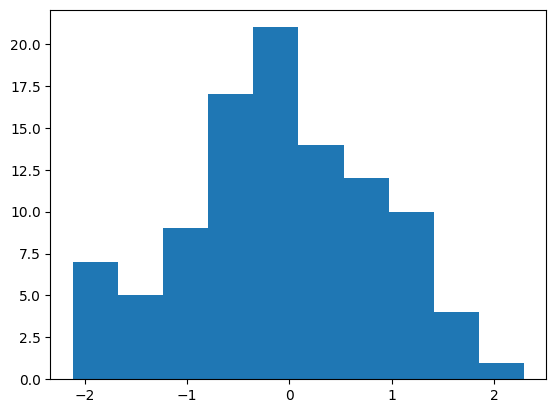

In [19]:
import matplotlib.pyplot as plt
plt.hist(ndata)
# 도수분포표
plt.show()

In [20]:
cutdata = pd.cut(ndata, 5 )
print(cutdata)

[(-2.117, -1.232], (-0.351, 0.53], (-1.232, -0.351], (-0.351, 0.53], (-0.351, 0.53], ..., (-0.351, 0.53], (-2.117, -1.232], (-0.351, 0.53], (0.53, 1.411], (-1.232, -0.351]]
Length: 100
Categories (5, interval[float64, right]): [(-2.117, -1.232] < (-1.232, -0.351] < (-0.351, 0.53] < (0.53, 1.411] < (1.411, 2.292]]


In [21]:
cutdata = pd.cut([1,2,3,4,5,6,7,8,9,10],5) # ------------구간이 동일/5개로 나눠라
print(cutdata.describe())
print(cutdata.value_counts())

              counts  freqs
categories                 
(0.991, 2.8]       2    0.2
(2.8, 4.6]         2    0.2
(4.6, 6.4]         2    0.2
(6.4, 8.2]         2    0.2
(8.2, 10.0]        2    0.2
(0.991, 2.8]    2
(2.8, 4.6]      2
(4.6, 6.4]      2
(6.4, 8.2]      2
(8.2, 10.0]     2
dtype: int64


In [22]:
my_range = [0,3,7,10]
# 0-3 / 4-7 / 8-10
res = pd.cut([1,2,3,4,5,6,7,8,9,10],my_range)
res.describe()
# (0,3] : 0이상 3미만

,counts,freqs
categories,,
"(0, 3]",3,0.3
"(3, 7]",4,0.4
"(7, 10]",3,0.3


In [23]:
my_range = [0,3,7,10]
my_label = ['대','중','소']
# 0-3 / 4-7 / 8-10
res = pd.cut([1,2,3,4,5,6,7,8,9,10], my_range, labels = my_label)
res.describe()

,counts,freqs
categories,,
대,3,0.3
중,4,0.4
소,3,0.3


## qcut()

In [24]:
np.random.seed(89)
ndata= np.random.normal(size = 100)
ndata

array([-1.69373003e+00, -2.12133296e-03, -4.25891840e-01, -2.55590464e-01,
       -3.05778836e-01,  4.05496840e-02, -6.83544278e-02, -1.20222410e+00,
       -1.82533369e-01, -8.79576069e-01, -2.43247772e-01,  6.74030740e-01,
        3.44946321e-01, -6.25284842e-01, -2.06451633e-01, -8.71597419e-01,
       -8.70105814e-01,  3.98147638e-01, -6.65255223e-01,  1.33677244e-01,
        7.86214675e-01, -5.31721216e-03, -5.46566075e-01,  5.54579631e-01,
        4.69517145e-01, -2.09123225e+00,  2.66136907e-03,  4.18356115e-01,
       -1.15841479e+00, -6.15288222e-01,  2.79659470e-01, -1.57288811e+00,
       -8.02347056e-01, -1.73179401e+00, -1.78260523e+00,  7.41370565e-01,
        1.74266804e+00, -1.31304313e+00,  3.69799126e-01,  1.37905029e+00,
       -3.34567377e-01, -1.62651754e-01,  1.63757631e-01, -1.69374974e+00,
        2.29213431e+00,  6.64245496e-01, -5.17025532e-01,  1.71873654e-01,
        9.27218701e-01,  3.79370769e-01,  7.72873330e-01,  1.33355697e-01,
       -6.22544193e-01, -

In [25]:
qdata = pd.qcut(ndata, 5) # ------수량을 동일하게, 구간을 들쑥날쑥
qdata.describe()

,counts,freqs
categories,,
"(-2.113, -0.816]",20,0.2
"(-0.816, -0.313]",20,0.2
"(-0.313, 0.133]",20,0.2
"(0.133, 0.776]",20,0.2
"(0.776, 2.292]",20,0.2


> <font size=4><b>(5) category타입
> * df['컬럼'].astype('category').cat.codes
> * df['컬럼'].astype('category').cat.categories

In [26]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]}
                 )
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [27]:
df['names_cat_codes'] = df['name'].astype('category').cat.codes
df

,name,score,names_cat_codes
0,smith,A,4
1,martin,B,3
2,jones,NaN,1
3,allen,A,0
4,king,C,2


In [28]:
df['names_cat_categories'] = df['name'].astype('category').cat.categories
df
# df.info()

,name,score,names_cat_codes,names_cat_categories
0,smith,A,4,allen
1,martin,B,3,jones
2,jones,NaN,1,king
3,allen,A,0,martin
4,king,C,2,smith
